In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-800:]
#df['y'] = df['y']*100

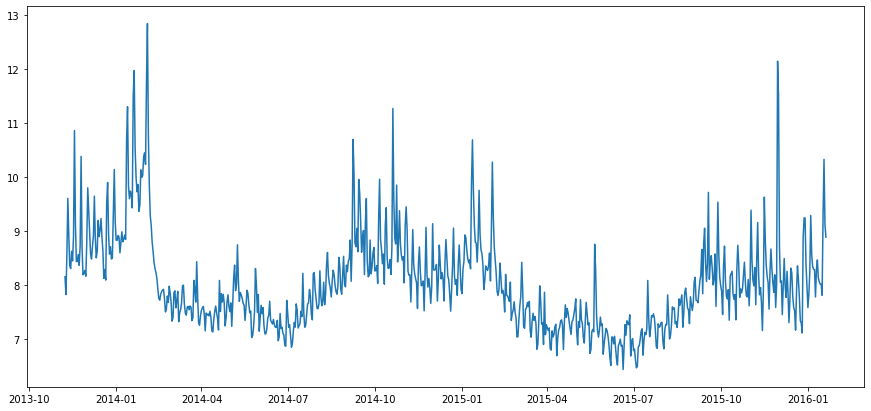

In [114]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [115]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
df_train = df.iloc[:-validation_size]
df_validation = df.iloc[-validation_size:]
print(df_train.shape)
print(df_validation.shape)

(640, 2)
(160, 2)


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import math
import Chronos


In [176]:
def make_train_df():
    y_data = pd.date_range('2018-01-01', '2019-01-01').astype(np.int64)/(1e9*60*60*24)
    y_data = y_data - y_data.min()

    train_df = np.sin(np.arange(1,100))
    train_df = pd.DataFrame(data={"ds": pd.date_range('2018-01-01', '2019-01-01'),
                                  "y" : np.sin(y_data*2*math.pi/365.25)})
    return train_df
    

In [177]:
train_df = make_train_df()
train_df

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.017202
2,2018-01-03,0.034398
3,2018-01-04,0.051584
4,2018-01-05,0.068755
...,...,...
361,2018-12-28,-0.073045
362,2018-12-29,-0.055879
363,2018-12-30,-0.038696
364,2018-12-31,-0.021501


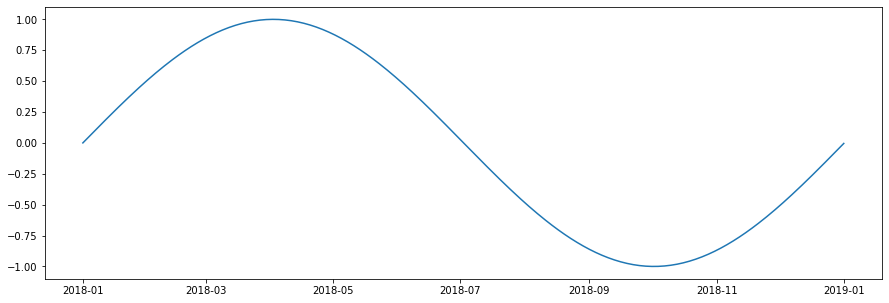

In [178]:
plt.figure(figsize=(15,5))
plt.plot(train_df['ds'], train_df['y'])
plt.show()

In [211]:
importlib.reload(Chronos)
train_df = make_train_df()
my_cr = Chronos.Chronos(G=100,
                        p_m= 0.3, 
                        r_m = 0.4,
                        yearly_seasonality=5,
                        weekly_seasonality=1)
my_cr = my_cr.fit(train_df)

population initalized


In [212]:
result_df = my_cr.predict(train_df)
result_df.head()




,ds,y,yhat
0,2018-01-01,0.000000,0.003241
1,2018-01-02,0.017202,-0.093661
2,2018-01-03,0.034398,-0.121363
3,2018-01-04,0.051584,-0.062690
4,2018-01-05,0.068755,0.034669


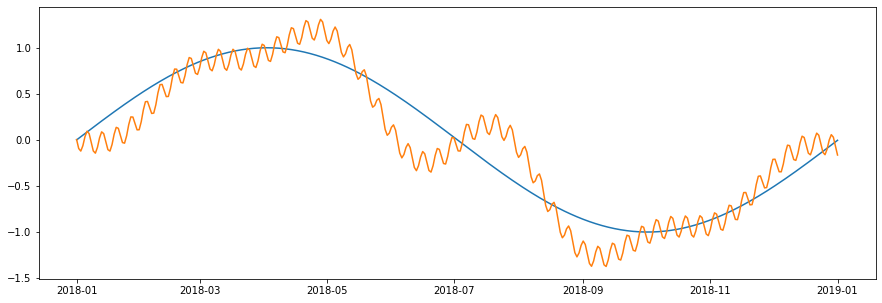

2
3
4
5
6
7


{'growth::const': 0.003241490426284438,
 'growth::coef': -0.00021119712651024867,
 'yearly::order_1_coef': 0.9579632292887332,
 'yearly::order_2_coef': -0.04271761789504731,
 'yearly::order_3_coef': -0.217900311600968,
 'yearly::order_4_coef': 0.1392470514011008,
 'yearly::order_5_coef': -0.2129453355855664,
 'weekly::order_1_coef': -0.11734026676240485}

In [213]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

In [214]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-800:]
#df['y'] = df['y']*100

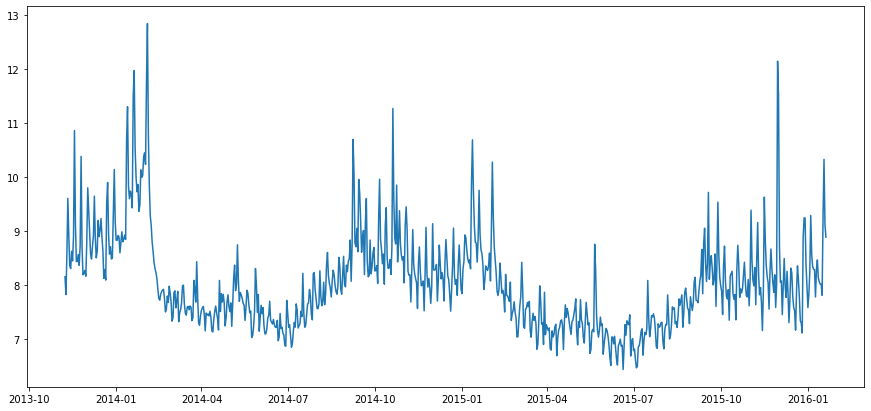

In [215]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [225]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]
print(train_df.shape)
print(validation_df.shape)

(640, 2)
(160, 2)


In [298]:
train_df

,ds,y,yhat
2105,2013-11-08,8.157657,9.569020
2106,2013-11-09,7.829233,9.234100
2107,2013-11-10,8.573952,8.782592
2108,2013-11-11,9.611329,9.843936
2109,2013-11-12,8.923858,9.393125
...,...,...,...
2740,2015-08-08,7.007601,7.770280
2741,2015-08-09,7.073270,7.360941
2742,2015-08-10,7.265430,8.464766
2743,2015-08-11,7.602401,8.056681


In [366]:
importlib.reload(Chronos)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]

my_cr = Chronos.Chronos(G=4000,
                        p_m= 0.1, 
                        r_m = 0.2,
                        yearly_seasonality=3,
                        weekly_seasonality=3)
my_cr = my_cr.fit(train_df)

population initalized


In [367]:
result_df = my_cr.predict(train_df)
result_df.head()

/Users/borisbshabash/Documents/repos/Chronos/Chronos.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_df['yhat'] = predictions


,ds,y,yhat
2105,2013-11-08,8.157657,8.645424
2106,2013-11-09,7.829233,8.442864
2107,2013-11-10,8.573952,8.477099
2108,2013-11-11,9.611329,8.606393
2109,2013-11-12,8.923858,8.735911


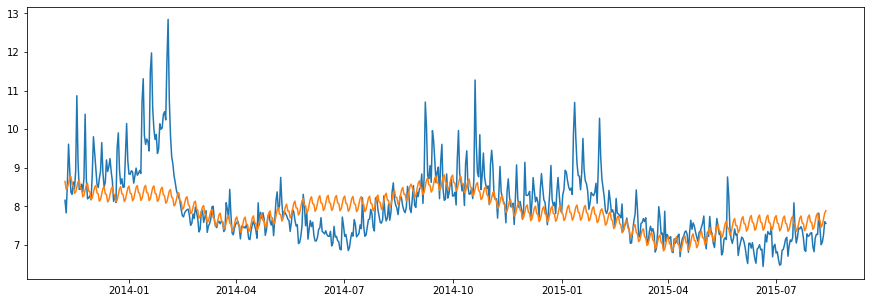

{'growth::const': 8.40222711166463,
 'growth::coef': -0.0013960946196902024,
 'yearly::order_1_coef': -0.4711634348793159,
 'yearly::order_2_coef': 0.047457095421230416,
 'yearly::order_3_coef': 0.19798948244344797,
 'weekly::order_1_coef': 0.17572128516266033,
 'weekly::order_2_coef': 0.02848495494403397,
 'weekly::order_3_coef': -0.04637098919363693}

In [368]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

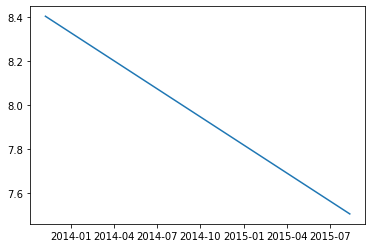

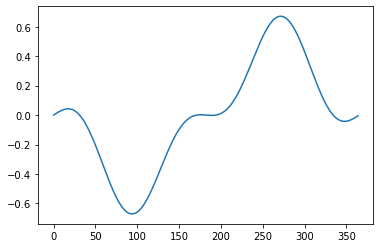

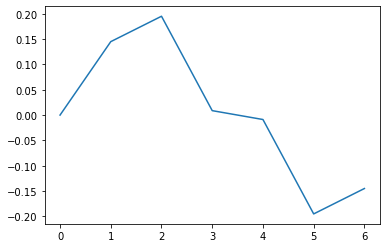

In [369]:
my_cr.plot_components(result_df)